Sources shape: (2, 85335)
Mixtures shape: (2, 85335)
Separated shape: (2, 85335)


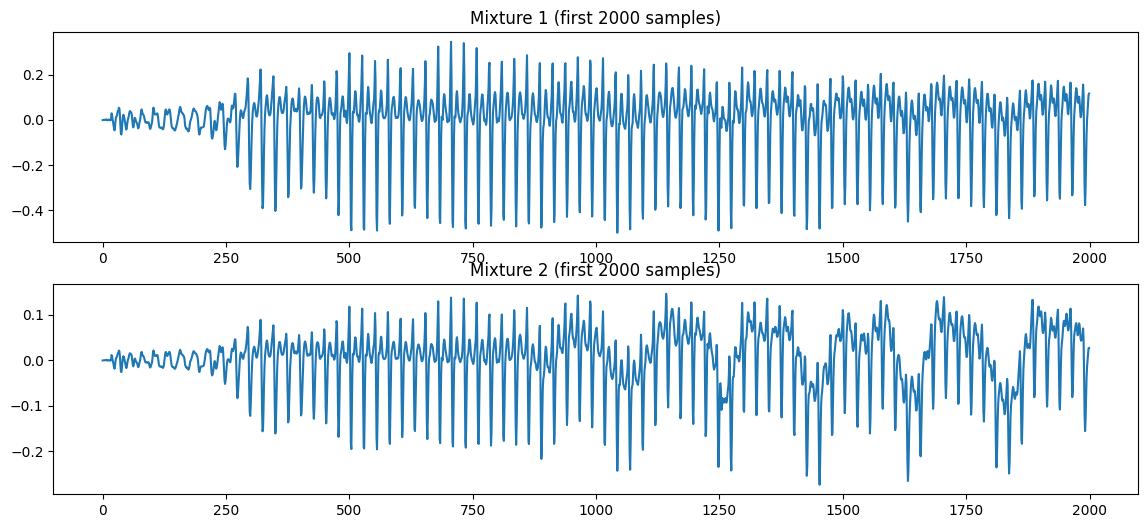

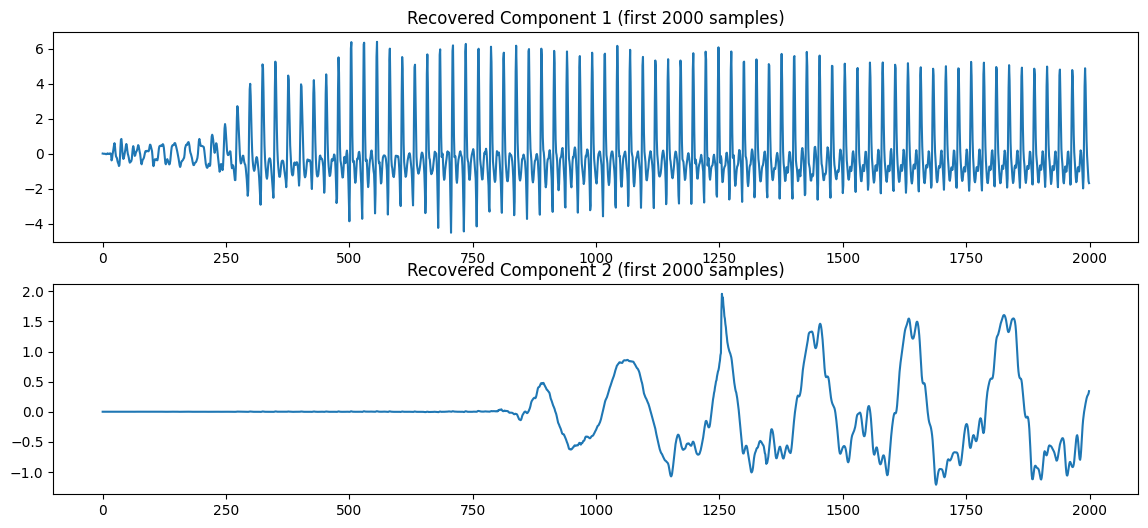

Saved separated components as WAVs.


In [1]:
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# ----------------------
# 1. Load mono signals
# ----------------------
y1, sr = librosa.load(librosa.ex('trumpet'), sr=16000)
y2, sr = librosa.load(librosa.ex('vibeace'), sr=16000)

# Make them same length
min_len = min(len(y1), len(y2))
y1 = y1[:min_len]
y2 = y2[:min_len]

S = np.vstack([y1, y2])  # shape (2, T)

print("Sources shape:", S.shape)

# ----------------------
# 2. Create a mixing matrix
# ----------------------
A = np.array([[1.0, 0.5],
              [0.4, 1.0]])

X = A @ S   # mixtures: (2, T)
print("Mixtures shape:", X.shape)

# ----------------------
# 3. Apply FastICA
# ----------------------
ica = FastICA(n_components=2, whiten='unit-variance', max_iter=2000)
S_hat = ica.fit_transform(X.T).T  # shape (2, T)

print("Separated shape:", S_hat.shape)

# ----------------------
# 4. Visualize results
# ----------------------
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.title("Mixture 1 (first 2000 samples)")
plt.plot(X[0, :2000])

plt.subplot(2,1,2)
plt.title("Mixture 2 (first 2000 samples)")
plt.plot(X[1, :2000])
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.title("Recovered Component 1 (first 2000 samples)")
plt.plot(S_hat[0, :2000])

plt.subplot(2,1,2)
plt.title("Recovered Component 2 (first 2000 samples)")
plt.plot(S_hat[1, :2000])
plt.show()

# ----------------------
# 5. Save output (optional)
# ----------------------
sf.write("ica_component_1.wav", S_hat[0], sr)
sf.write("ica_component_2.wav", S_hat[1], sr)

print("Saved separated components as WAVs.")


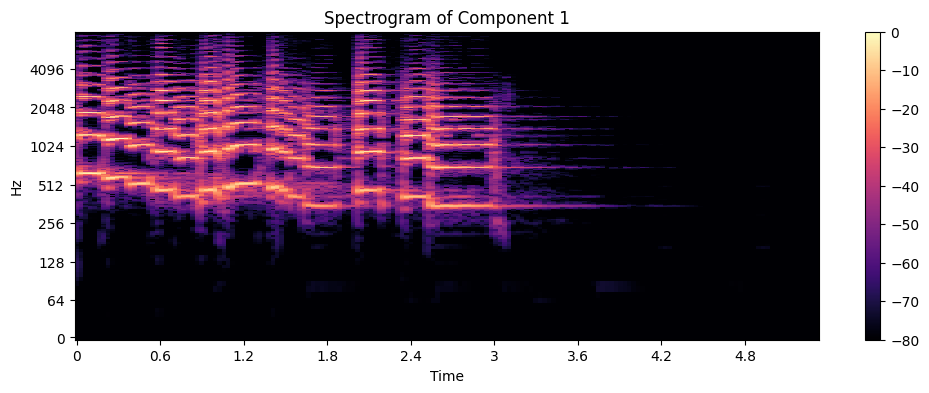

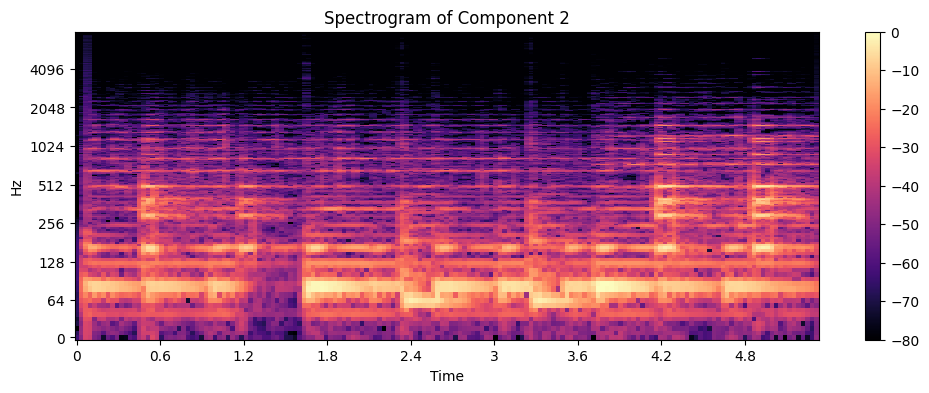

In [2]:
import librosa.display

plt.figure(figsize=(12, 4))
D1 = librosa.amplitude_to_db(np.abs(librosa.stft(S_hat[0])), ref=np.max)
librosa.display.specshow(D1, sr=sr, x_axis='time', y_axis='log')
plt.title("Spectrogram of Component 1")
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 4))
D2 = librosa.amplitude_to_db(np.abs(librosa.stft(S_hat[1])), ref=np.max)
librosa.display.specshow(D2, sr=sr, x_axis='time', y_axis='log')
plt.title("Spectrogram of Component 2")
plt.colorbar()
plt.show()


In [3]:
from IPython.display import Audio
Audio(S_hat[0], rate=sr)